### We will construct a linear model that can predict a car's mileage (mpg) by using its other attributes.

In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# To build linear regression_model
import statsmodels.api as sm
sns.set_theme('paper',font_scale=2)
sns.set_style('ticks')


### Understanding different kind of distribution 

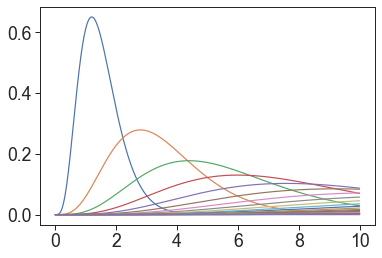

In [2]:

import numpy as np
import scipy.stats as stats 



# define x-axis value 
x = np.linspace (0, 10, 1000) 

#calculate pdf of Gamma distribution for each x-value
for i in np.arange(0.3,10,0.4):
    y = stats.gamma.pdf(x, a=5, scale=i)

    #create plot of Gamma distribution
    plt.plot(x, y)

#display plot
plt.show()

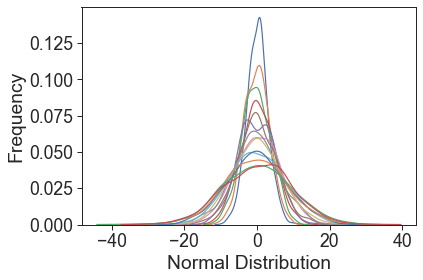

In [3]:
#calculate pdf of Gamma distribution for each x-value
for i in np.arange(3,10,0.5):
    y = stats.norm.rvs(loc=0, scale=i,size=1000)
    ax = sns.kdeplot(y)
                                   
                 
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()


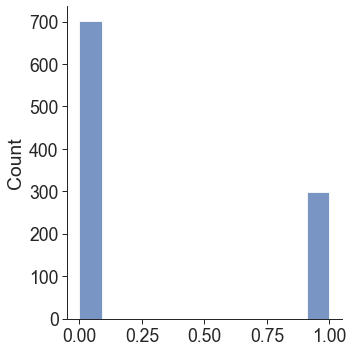

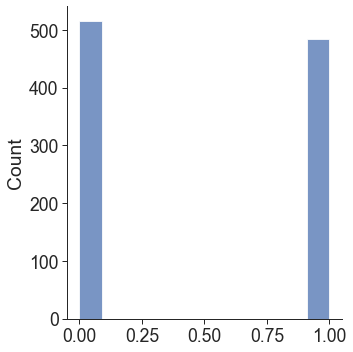

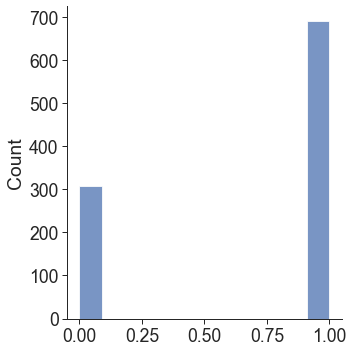

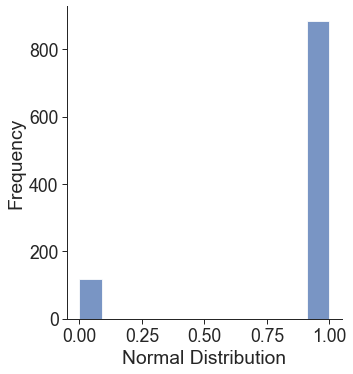

In [5]:
#calculate pdf of Gamma distribution for each x-value
for i in np.arange(0.3,1,0.2):
    y = stats.binom.rvs(n=1,p=i,size=1000)
    ax = sns.displot(y)
                                   
                 
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

### Data Description: 
1. mpg: miles per gallon
2. weight: weight of the car in pounds


## Load and explore the data

In [74]:
cData = pd.read_csv("auto-mpg.csv")

In [75]:

cData[[	'mpg','weight']].head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


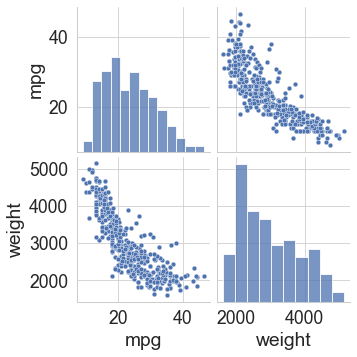

In [36]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(cData[["mpg", "weight"]])
plt.show()

### observation 
The 'weight' column has a slight nonlinear relationship with 'mpg'. We can transform the 'weight' column.

In [37]:
# using Power transformation
#X_train["weight_sq"] = np.log10(X_train["weight"])
PT=PowerTransformer(method='box-cox', standardize=False)
X_train["weight"] =PT.fit_transform(X_train[["weight"]].values)
y_train1 =PT.fit_transform(y_train)


Text(0.5, 1.0, 'Normal distribution Q_Q plot')

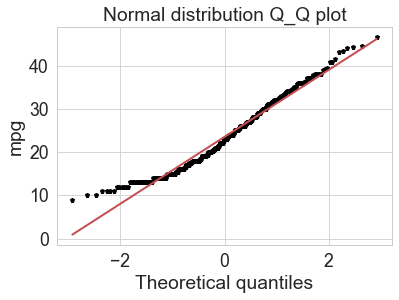

In [38]:
ax=plt.subplot(111)
prob=stats.probplot(cData['mpg'],dist='norm',plot=plt);
ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_markerfacecolor('black')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[1].set_linewidth(2.0)
ax.set_ylabel('mpg')
ax.set_title('Normal distribution Q_Q plot')


9.054535200995204 0 2.596993919879738


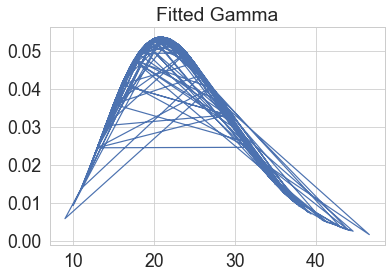

In [39]:
data=cData['mpg']
# Gamma
shape, loc, scale = stats.gamma.fit(data, floc=0)
print(shape, loc, scale)
y = stats.gamma.pdf(data, shape, loc, scale)
plt.title('Fitted Gamma')
plt.plot(data, y)
plt.show()

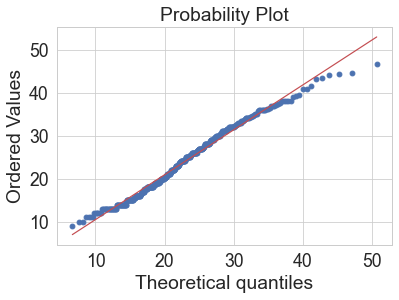

In [40]:
stats.probplot(cData['mpg'],dist='gamma',plot=plt,sparams=( 9,0, 2.5 ))
plt.show()


<Figure size 648x648 with 0 Axes>

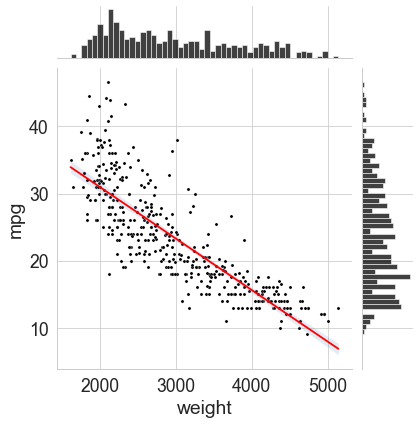

In [42]:
ax=plt.figure(figsize=(9,9))
joint_plot=sns.jointplot(data=cData,x=cData['weight'],y=cData['mpg'],color='black',s=10,marginal_kws=dict(bins=50))
reg_plot=sns.regplot(data=cData,x=cData['weight'],y=cData['mpg'],scatter=False,ax=joint_plot.ax_joint)
regline = reg_plot.get_lines()[0]
regline.set_color('red')
regline.set_zorder(3)


<Figure size 648x648 with 0 Axes>

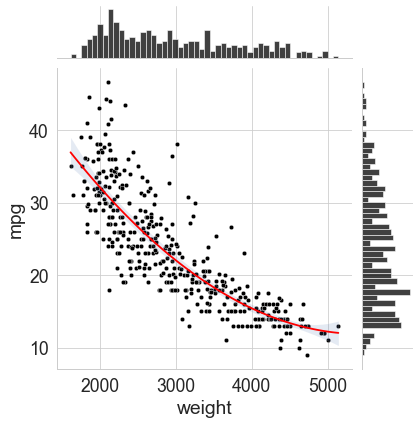

In [43]:
ax=plt.figure(figsize=(9,9))
joint_plot=sns.jointplot(data=cData,x=cData['weight'],y=cData['mpg'],color='black',s=20,marginal_kws=dict(bins=50))
reg_plot=sns.regplot(data=cData,x=cData['weight'],y=cData['mpg'],scatter=False,ax=joint_plot.ax_joint,order=3)
regline = reg_plot.get_lines()[0]
regline.set_color('red')
regline.set_zorder(3)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

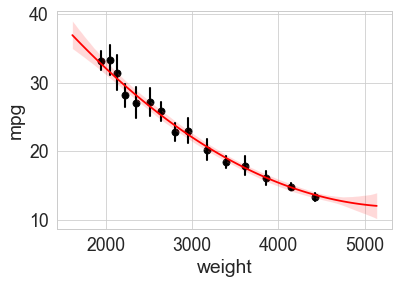

In [44]:
sns.regplot(data=cData,x=cData['weight'],y=cData['mpg'],x_bins=15,scatter=True,order=3,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'}
            )

<AxesSubplot:xlabel='weight', ylabel='mpg'>

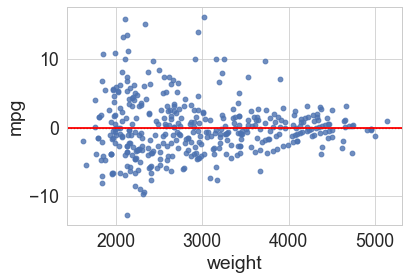

In [45]:
sns.residplot(data=cData,x=cData['weight'],y=cData['mpg'],lowess=True,line_kws={'color':'red'},order=3)

## Normal distribution 

In [46]:
pwt=PowerTransformer(method='box-cox',standardize=True)
cData['mpg_pwt']=pwt.fit_transform(cData['mpg'].values.reshape(-1, 1))

Text(0.5, 1.0, 'Normal Distribution')

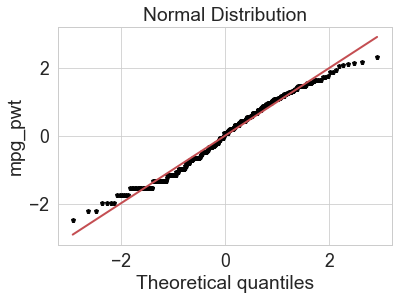

In [47]:
ax=plt.subplot(111)
prob=stats.probplot(cData['mpg_pwt'],dist='norm',plot=plt);
ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_markerfacecolor('black')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[1].set_linewidth(2.0)
ax.set_ylabel('mpg_pwt')
ax.set_title('Normal Distribution')

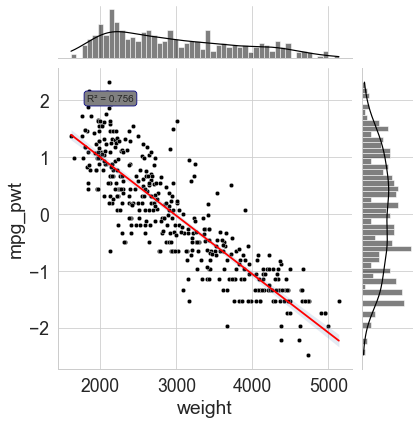

In [48]:
r, p = stats.pearsonr(cData['weight'],cData['mpg_pwt'])
joint_plot=sns.jointplot(height=6,data=cData,x=cData['weight'],y=cData['mpg_pwt'],color='black',s=20,marginal_kws=dict(bins=50,kde=True))
reg_plot=sns.regplot(data=cData,x=cData['weight'],y=cData['mpg_pwt'],scatter=False,ax=joint_plot.ax_joint,order=1)
joint_plot.ax_joint.annotate(f'R\u00b2 = {r**2:.3f}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'gray', 'ec': 'navy'})
regline = reg_plot.get_lines()[0]
regline.set_color('red')
regline.set_zorder(3)

<AxesSubplot:xlabel='weight', ylabel='mpg_pwt'>

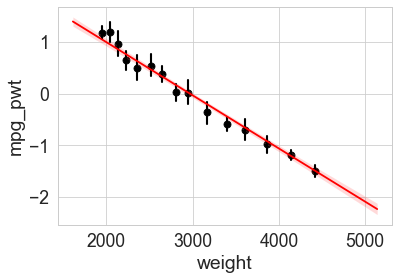

In [49]:
sns.regplot(data=cData,x=cData['weight'],y=cData['mpg_pwt'],x_bins=15,scatter=True,order=1,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'}
            )

Text(0.5, 1.0, 'Residual ')

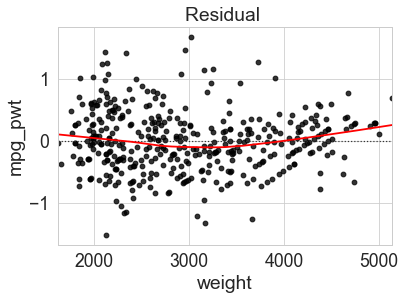

In [50]:
sns.residplot(data=cData,x='weight',y='mpg_pwt',lowess=True,scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.title('Residual ')

In [51]:
from sklearn.linear_model  import LinearRegression
linear_model = LinearRegression()

In [52]:

def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

In [53]:
normal_errors_assumption(linear_model, cData['weight'], cData['mpg_pwt'], p_value_thresh=0.05)

Assumption 2: The error terms are normally distributed 



NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

9.054535200995204 0 2.596993919879738


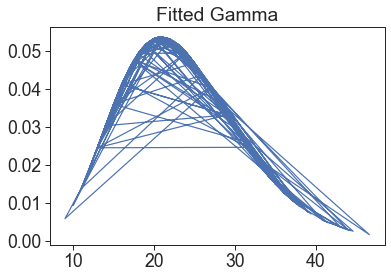

In [ ]:
data=cData['mpg']
# Gamma
shape, loc, scale = stats.gamma.fit(data, floc=0)
print(shape, loc, scale)
y = stats.gamma.pdf(data, shape, loc, scale)
plt.title('Fitted Gamma')
plt.plot(data, y)
plt.show()

In [54]:
cData['inverse_mpg']=1/cData['mpg']

Text(0.5, 1.0, 'Gamma Distribution')

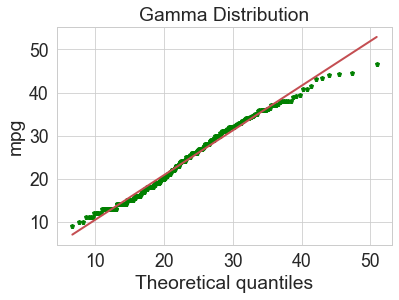

In [55]:
ax=plt.subplot(111)
prob=stats.probplot(cData['mpg'],dist='gamma',plot=plt,sparams=(9.05,0, 2.5));
ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_markerfacecolor('green')
ax.get_lines()[0].set_markeredgecolor('green')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[1].set_linewidth(2.0)
ax.set_ylabel('mpg')
ax.set_title('Gamma Distribution')

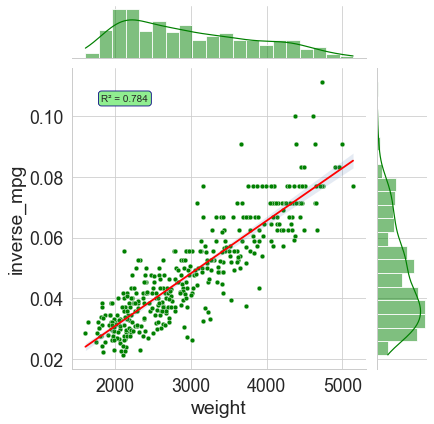

In [56]:
r, p = stats.pearsonr(cData['weight'],cData['inverse_mpg'])

joint_plot=sns.jointplot(data=cData,x='weight',y='inverse_mpg',color='green',marginal_kws=dict(bins=20,kde=True))
reg_plot=sns.regplot(data=cData,x='weight',y='inverse_mpg',scatter=False,ax=joint_plot.ax_joint)
joint_plot.ax_joint.annotate(f'R\u00b2 = {r**2:.3f}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'lightgreen', 'ec': 'navy'})
regline = reg_plot.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
plt.show()

<AxesSubplot:xlabel='weight', ylabel='inverse_mpg'>

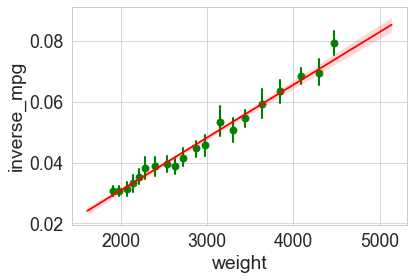

In [57]:


sns.regplot(data=cData,x='weight',y='inverse_mpg',x_bins=20,scatter=True,scatter_kws={'color': 'green'}, line_kws={'color': 'red'})


Text(0.5, 1.0, 'Residual ')

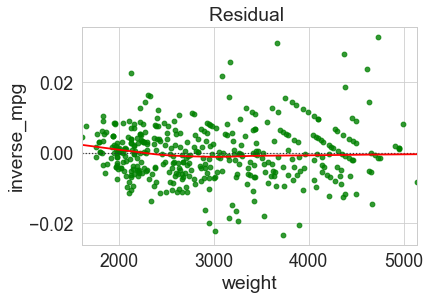

In [58]:
sns.residplot(data=cData,x='weight',y='inverse_mpg',lowess=True,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title('Residual ')

## Categorical data

In [59]:
mpg_category=pd.qcut(cData['mpg'],2,labels=[0,1])

In [60]:
y_train2=pd.qcut(y_train.iloc[:,0],2,labels=[0,1])

In [61]:

lm=sm.Logit(y_train2,X_train[['const','weight']])
lmfit_logit=lm.fit()
print(lmfit_logit.summary())

Optimization terminated successfully.
         Current function value: 0.308205
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    mpg   No. Observations:                  278
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Nov 2022   Pseudo R-squ.:                  0.5545
Time:                        13:12:15   Log-Likelihood:                -85.681
converged:                       True   LL-Null:                       -192.34
Covariance Type:            nonrobust   LLR p-value:                 2.588e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        493.7194     56.691      8.709      0.000     382.607     604.832
weight      -187.1745     21.

In [62]:
cData['binary_mpg']=pd.qcut(cData['mpg'],2,labels=[1,0])

<AxesSubplot:xlabel='binary_mpg', ylabel='count'>

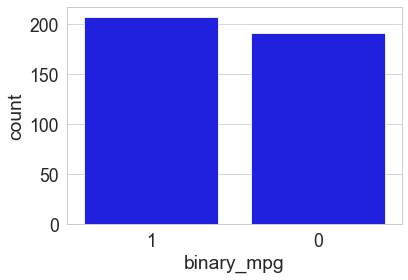

In [63]:
sns.countplot(data=cData,x='binary_mpg',color='blue')

<AxesSubplot:xlabel='weight', ylabel='binary_mpg'>

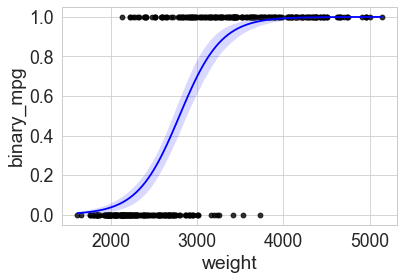

In [64]:
sns.regplot(data=cData,x='weight',y='binary_mpg',logistic=True,
            scatter_kws={'color': 'black'}, line_kws={'color': 'blue'}
            )

In [65]:
def estimation (x):
    return np.count_nonzero(x)/len(x)

Text(0, 0.5, 'P(binay_mpg)')

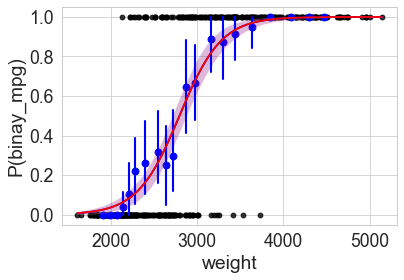

In [70]:
ax=sns.regplot(data=cData,x='weight',y='binary_mpg',logistic=True,
            scatter_kws={'color': 'black'}, line_kws={'color': 'blue'}
            )
sns.regplot(data=cData,x='weight',y='binary_mpg',x_bins=20,scatter=True,logistic=True,
            scatter_kws={'color': 'blue'}, ax=ax,
            line_kws={'color': 'red'},x_estimator=estimation)
plt.ylabel('P(binay_mpg)')
